In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import re 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [12]:
data = pd.read_csv('/Users/merkava/Documents/School/Software engineering/SAS/data/raw/Steam.csv')
data.dropna(inplace=True)

print(data.shape)
print(f"Dataset shape: {data.shape}")



(17316, 5)
Dataset shape: (17316, 5)


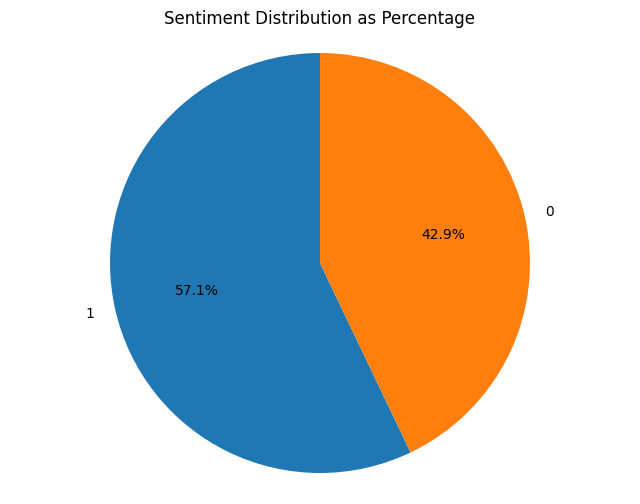

In [13]:
balance = data['user_suggestion'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(balance, labels=balance.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution as Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenize text
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return ' '.join(tokens)


[nltk_data] Downloading package punkt to /Users/merkava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/merkava/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
data['cleaned_review'] = data['user_review'].apply(preprocess_text)

# Extract features and target variables
X = data['cleaned_review']
y = data['user_suggestion']  
# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

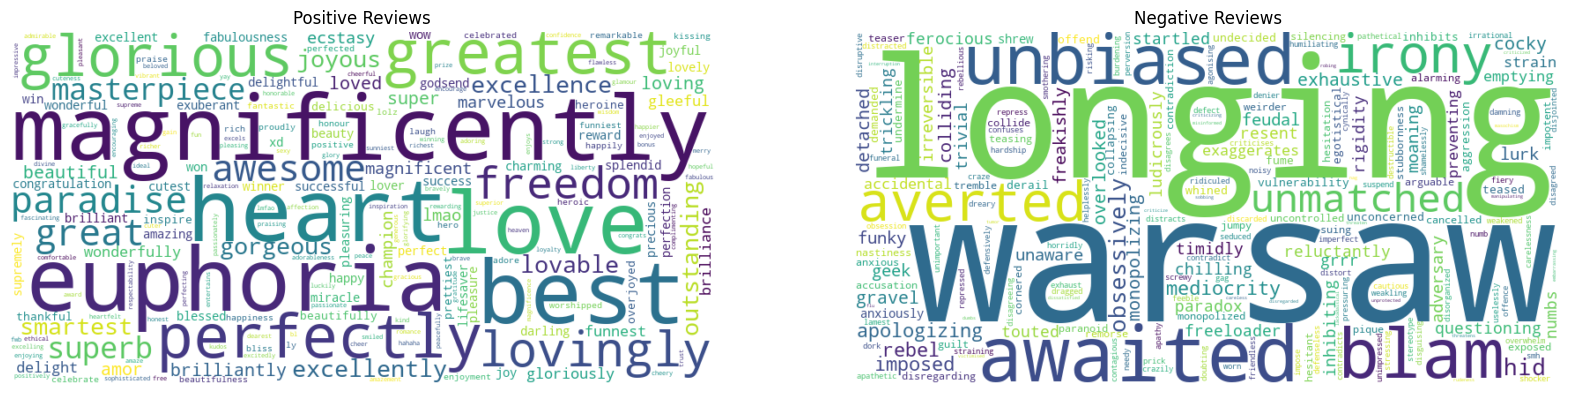

In [20]:

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
  scores = analyzer.polarity_scores(text)
  return scores['compound']

def plot_wordclouds(df):

  # Combine all reviews for each sentiment
  positive_reviews = " ".join(df[df['user_suggestion'] == 1]['cleaned_review'])
  negative_reviews = " ".join(df[df['user_suggestion'] == 0]['cleaned_review'])

  positive_word_scores = {word: get_sentiment_score(word) for word in positive_reviews.split()}
  negative_word_scores = {word: get_sentiment_score(word) for word in negative_reviews.split()}

  # Create WordCloud objects
  #positive_word_counts = Counter(positive_reviews.split())
  negative_word_counts = Counter(negative_reviews.split())

  # Create WordCloud objects with frequency and sentiment score weighting
  wordcloud_positive = WordCloud(width=800, height=400, background_color='white', 
                                  stopwords=STOPWORDS).generate_from_frequencies(positive_word_scores)

  # Filter out words with positive sentiment scores from the negative word cloud
  negative_word_scores_filtered = {word: score * negative_word_counts[word] 
                                   for word, score in negative_word_scores.items() if score < 0}

  wordcloud_negative = WordCloud(width=800, height=400, background_color='white', 
                                  stopwords=STOPWORDS).generate_from_frequencies(negative_word_scores_filtered)
  # Display the generated images
  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.imshow(wordcloud_positive, interpolation='bilinear')
  plt.title('Positive Reviews')
  plt.axis("off")

  plt.subplot(1, 2, 2)
  plt.imshow(wordcloud_negative, interpolation='bilinear')
  plt.title('Negative Reviews')
  plt.axis("off")

  plt.show()

plot_wordclouds(data)


In [19]:
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)